In [1]:
# 1. 데이터 로드
# 2. 데이터 구조 및 기초 통계 확인
# 3. 결측치 및 이상치 탐색
# 4. 데이터 시각화를 통한 탐색
# 5. 데이터 정제 및 전처리
# 6. 데이터 변환 및 피처 엔지니어링
# 7. 데이터 분할

# 1. 데이터 로드
# 2. 데이터 구조 및 기초 통계 확인
# 3. 결측치 및 이상치 탐색
# 4. 데이터 정제 및 전처리 (시각화를 위한)
# 5. 데이터 시각화를 통한 탐색
# 6. 데이터 정제 및 전처리
# 7. 데이터 변환 및 피처 엔지니어링
# 8. 데이터 분할

In [2]:
# 문자열 비교를 위한 설치
# !pip install fuzzywuzzy python-Levenshtein

# # EDA

- [팀 노션](https://www.notion.so/3-27db306ac5a680b199fcf831b838cd25)
- [팀 깃허브](https://github.com/SKNetworks-AI19-250818/SKN19_2ND_3TEAM)
- [데이터 출처](https://github.com/JackBrowne556/Netflix-Churn-Project)

## ## 0. 초기화

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 문자열 비교 및 대체 용도
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


# pandas 출력 옵션
pd.set_option('display.float_format', '{:.2f}'.format)

# # 전체 행 출력을 위한 pandas 옵션 설정
# pd.set_option('display.max_rows', None)  # 모든 행 출력


# # # 출력 후 기본값으로 복원 (선택사항)
# pd.reset_option('display.max_rows')

In [4]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

## ## 1. 데이터 로드

In [5]:
df_origin = pd.read_csv('./data/netflix_user_data_unclean.csv')

origin_cnt = df_origin.shape[0]
# 테스트를 위한 분리
df = df_origin

In [6]:
# 컬럼 ID - 설명 매핑
rename_map = {
    "Customer ID": "고객번호",
    "Subscription Length (Months)": "구독기간_개월",
    "Customer Satisfaction Score (1-10)": "고객만족도_1_10",
    "Daily Watch Time (Hours)": "일일시청시간_시간",
    "Engagement Rate (1-10)": "참여도_1_10",
    "Device Used Most Often": "주이용기기",
    "Genre Preference": "선호장르",
    "Region": "지역",
    "Payment History (On-Time/Delayed)": "결제이력_정시_지연",
    "Subscription Plan": "구독플랜",
    "Churn status": "이탈여부",
    "Support Queries Logged": "지원문의_건수",
    "Age": "나이",
    "Monthly Income ($)": "월소득_달러",
    "Promotional Offers Used": "프로모션_사용",
    "Number of Profiles Created": "생성프로필수"
}

## ## 2. 데이터 구조 및 기초 통계 확인


- 결과
  - 총 16개 컬럼
  - 전체 컬럼에서 결측치 확인
  - 중복행 1,445건 확인 - 중복제거 필요

In [7]:
# 전체 구조 확인
print(df.info())

"""
0   Customer ID                         119,378 object  # 🆎 문자형, 결측치: 401
1   Subscription Length (Months)        119,379 object  # 🔢 숫자형, 결측치: 400
2   Customer Satisfaction Score (1-10)  119,369 object  # 🔢 숫자형, 결측치: 410
3   Daily Watch Time (Hours)            119,352 object  # 🔢 숫자형, 결측치: 427
4   Engagement Rate (1-10)              119,354 object  # 🔢 숫자형, 결측치: 425
5   Device Used Most Often              119,332 object  # 🆎 문자형, 결측치: 447
6   Genre Preference                    119,342 object  # 🆎 문자형, 결측치: 437
7   Region                              119,380 object  # 🆎 문자형, 결측치: 399
8   Payment History (On-Time/Delayed)   119,330 object  # 🆎 문자형, 결측치: 449
9   Subscription Plan                   119,383 object  # 🆎 문자형, 결측치: 396
10  Churn status                        119,391 object  # 🆎 문자형, 결측치: 388
11  Support Queries Logged              119,349 object  # 🔢 숫자형, 결측치: 430
12  Age                                 118,542 float64 # 🔢 숫자형, 결측치: 1237
13  Monthly Income ($)                  119,360 object  # 🔢 숫자형, 결측치: 419
14  Promotional Offers Used             119,336 object  # 🔢 숫자형, 결측치: 443
15  Number of Profiles Created          119,381 object  # 🔢 숫자형, 결측치: 398


"""

# 구조 확인 2
display(df.head(5))

# 중복행 확인
print("\n중복행: ", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119779 entries, 0 to 119778
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         119378 non-null  object 
 1   Subscription Length (Months)        119379 non-null  object 
 2   Customer Satisfaction Score (1-10)  119369 non-null  object 
 3   Daily Watch Time (Hours)            119352 non-null  object 
 4   Engagement Rate (1-10)              119354 non-null  object 
 5   Device Used Most Often              119332 non-null  object 
 6   Genre Preference                    119342 non-null  object 
 7   Region                              119380 non-null  object 
 8   Payment History (On-Time/Delayed)   119330 non-null  object 
 9   Subscription Plan                   119383 non-null  object 
 10  Churn status                        119391 non-null  object 
 11  Support Queries Logged    

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,C000001,12,10,4.85,4,Tablet,Action,Europe,On-Time,Basic,Yes,10,33.00,6250,5,2
1,C000002,12,8,1.75,9,Laptop,Thriller,Europe,On-Time,Basic,Yes,9,28.00,7018,1,5
2,C000003,3,4,2.75,9,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3,18.00,1055,1,5
3,C000004,3,7,3,9,Smart TV,Drama,Europe,Delayed,Premium,Yes,5,32.00,6707,5,4
4,C000005,24,2,1.37,5,Mobile,Drama,North America,On-Time,Standard,Yes,2,59.00,1506,3,5



중복행:  1445


## ## 3. 결측치 및 이상치 탐색

### ### 1. Customer ID - 고객번호

- 결과
  - 정상 데이터의 경우 C123456(C + 숫자6자리) 형식을 가지고 감
  - 이상치 사례들
    - NaN
    - '###'
    - z014464
    - y117407
    - x065493
    - Cz76729
  - 결측치와 이상치를 처리하는 방법에 대해서 논의 필요

- 의견
  - 결측치, 이상치를 모두 공백화 하고 새로운 코드 부여
    - 재활용 가능

In [8]:
# 결측치 있음

print(df['Customer ID'].isna().sum(), (df['Customer ID'].isna().sum() / df.shape[0]) * 100)

# 이상치 있음
df['Customer ID'].sort_values()

401 0.334783225774134


60887     ###
37394     ###
37469     ###
37884     ###
37897     ###
         ... 
117004    NaN
118253    NaN
118822    NaN
119056    NaN
119721    NaN
Name: Customer ID, Length: 119779, dtype: object

In [9]:
def displayCountNonNumeric(df, col_name, show_all=False):
    """
    숫자로 예상되는 컬럼의 숫자가 아닌 데이터를 노출한다.
    """
    # 1. 숫자로 변환될 수 없는 값은 NaN으로 강제 변환
    numeric_series = pd.to_numeric(df[col_name], errors='coerce')

    # 2. 숫자로 변환된 값(NaN이 아님)과 원래 NaN이 아닌 값(문자열 등)을 구분
    # True: 숫자가 아니거나, 공백이거나, 원래 NaN이었던 값
    non_numeric_mask = numeric_series.isna()

    # 3. 원본 데이터프레임에서 숫자가 아닌 행만 필터링
    non_numeric_data = df[non_numeric_mask]

    # 4. value_counts()를 사용하여 빈도수를 계산하되,
    #    NaN 값도 결과에 포함시키도록 dropna=False 설정
    df_result = non_numeric_data[col_name].value_counts(dropna=False).reset_index()

    # 컬럼 이름 변경
    df_result.columns = [col_name, 'count']
    # df_result['percent'] = df_result['count'] / df.shape[0] * 100
    df_result['percent'] = (df_result['count'] / df.shape[0] * 100).round(4)

    pd.set_option('display.float_format', '{:.4f}'.format)

    if show_all:
        # 전체 행 출력을 위한 pandas 옵션 설정
        pd.set_option('display.max_rows', None)  # 모든 행 출력
    # 5. 결과 출력
    display(df_result)

    if show_all:
        # # 출력 후 기본값으로 복원 (선택사항)
        pd.reset_option('display.max_rows')

    pd.set_option('display.float_format', '{:.2f}'.format)

def displayPatterns(df, col, show_all=False):
    """
    문자열 컬럼 데이터 분포 보기
    """
    if show_all:
        # 전체 행 출력을 위한 pandas 옵션 설정
        pd.set_option('display.max_rows', None)  # 모든 행 출력

    df_result = df[col].value_counts(dropna=False).reset_index()
    df_result['percent'] = (df_result['count'] / df.shape[0] * 100).round(4)

    pd.set_option('display.float_format', '{:.4f}'.format)

    print(df_result)
    
    pd.set_option('display.float_format', '{:.2f}'.format)

    if show_all:
        # # 출력 후 기본값으로 복원 (선택사항)
        pd.reset_option('display.max_rows')

def fuzzy_match_and_clean(wrong_value, allowed_values, THRESHOLD = 80):
    """
    주어진 오류 값(wrong_value)를 허용 목록(allowed_values)과 비교하여
    유사도가 임계값(THRESHOLD) 이상이면 가장 유사한 값으로 대체합니다.
    """
    if wrong_value in allowed_values or pd.isna(wrong_value) or wrong_value == '':
        return wrong_value
    
    # process.extractOne: 목록에서 가장 유사한 항목 1개를 찾아냄
    # 결과: ('가장 유사한 장르', 유사도 점수)
    best_match = process.extractOne(wrong_value, allowed_values)
    
    match_value = best_match[0]
    score = best_match[1]
    
    if score >= THRESHOLD:
        # 유사도 점수가 높으면 정상 장르로 대체
        return match_value
    else:
        # 유사도 점수가 낮으면(너무 다른 단어이면) np.nan 등으로 남겨서 후속 처리를 유도
        return wrong_value
    
def printMiddle(before_cnt, after_cnt):
    print("최초", origin_cnt, "처리 전", before_cnt, "처리 후", after_cnt, '제거됨', before_cnt - after_cnt, '누적제거', origin_cnt - after_cnt)

### ### 2. Subscription Length (Months) - 구독기간_개월

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [10]:
displayCountNonNumeric(df, 'Subscription Length (Months)')

,Subscription Length (Months),count,percent
0,NaN,400,0.3339
1,###,396,0.3306
2,2z,21,0.0175
3,2y,18,0.0150
4,2x,18,0.0150
5,x4,18,0.0150
6,x2,15,0.0125
7,1x,15,0.0125
8,1y,13,0.0109
9,z4,11,0.0092


### ### 3. Customer Satisfaction Score (1-10) - 고객만족도_1_10

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [11]:
displayCountNonNumeric(df, 'Customer Satisfaction Score (1-10)')

,Customer Satisfaction Score (1-10),count,percent
0,NaN,410,0.3423
1,1z,13,0.0109
2,x0,10,0.0083
3,1x,9,0.0075
4,z0,8,0.0067
5,y0,4,0.0033
6,1y,3,0.0025


### ### 4. Daily Watch Time (Hours) - 일일시청시간_시간

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [12]:
displayCountNonNumeric(df, 'Daily Watch Time (Hours)')

,Daily Watch Time (Hours),count,percent
0,###,432,0.3607
1,NaN,427,0.3565
2,z.12,4,0.0033
3,2.y8,4,0.0033
4,1.2y,4,0.0033
...,...,...,...
343,3x99,1,0.0008
344,x.18,1,0.0008
345,2.0x,1,0.0008
346,y.81,1,0.0008


### ### 5. Engagement Rate (1-10) - 참여도_1_10

- 결과
  - 숫자를 제외한 컬럼들은 모두 결측치 처리 필요

In [13]:
displayCountNonNumeric(df, 'Engagement Rate (1-10)')

,Engagement Rate (1-10),count,percent
0,NaN,425,0.3548
1,1x,11,0.0092
2,y0,7,0.0058
3,1z,7,0.0058
4,z0,5,0.0042
5,1y,5,0.0042
6,x0,2,0.0017


### ### 6. Device Used Most Often - 주이용기기

- 결과
  - 'Laptop', 'Mobile', 'Tablet', 'Smart TV', 'Desktop' 를 제외한 나머지는 변환 필요

In [14]:
displayPatterns(df, 'Device Used Most Often', True)

    Device Used Most Often  count  percent
0                   Laptop  26652  22.2510
1                   Mobile  23785  19.8574
2                   Tablet  23691  19.7789
3                 Smart TV  22406  18.7061
4                  Desktop  21968  18.3404
5                      NaN    447   0.3732
6         Smart_Television    411   0.3431
7                   Laptoz     13   0.0109
8                   Txblet     13   0.0109
9                   Laxtop     12   0.0100
10                  Mobyle      9   0.0075
11                  Tazlet      9   0.0075
12                  xablet      8   0.0067
13                Smazt TV      7   0.0058
14                  Mobize      7   0.0058
15                  Tyblet      7   0.0058
16                  xobile      7   0.0058
17                  Tabley      7   0.0058
18                  Tabxet      7   0.0058
19                  Laptzp      7   0.0058
20                xmart TV      7   0.0058
21                  Lapxop      7   0.0058
22         

### ### 7. Genre Preference - 선호장르

In [15]:
displayPatterns(df, 'Genre Preference', True)

    Genre Preference  count  percent
0             Sci-Fi  19801  16.5313
1            Romance  17100  14.2763
2              Drama  17072  14.2529
3           Thriller  16633  13.8864
4        Documentary  16457  13.7395
5             Action  16103  13.4439
6             Comedy  15402  12.8587
7                NaN    437   0.3648
8            Dramedy    385   0.3214
9              Drzma      7   0.0058
10            Actioy      6   0.0050
11             xrama      6   0.0050
12            Sci-Fz      6   0.0050
13            Scz-Fi      6   0.0050
14       Documentzry      6   0.0050
15            yci-Fi      6   0.0050
16             Dramz      6   0.0050
17            Actzon      6   0.0050
18            Acyion      6   0.0050
19            Actyon      6   0.0050
20             Dzama      5   0.0042
21            Comzdy      5   0.0042
22            Actiyn      5   0.0042
23           Romanze      5   0.0042
24            Comexy      5   0.0042
25            Comezy      5   0.0042
2

### ### 8. Region - 지역

In [16]:
displayPatterns(df, 'Region', True)

            Region  count  percent
0             Asia  24282  20.2723
1           Africa  24063  20.0895
2           Europe  23831  19.8958
3    South America  23807  19.8758
4    North America  22544  18.8213
5          Eurasia    417   0.3481
6              NaN    399   0.3331
7             Azia     12   0.0100
8           Afyica     12   0.0100
9             Asiy     11   0.0092
10            Asxa      9   0.0075
11            Asix      9   0.0075
12          Afxica      8   0.0067
13          Euyope      8   0.0067
14          Europx      8   0.0067
15            Ayia      8   0.0067
16            zsia      8   0.0067
17            Asya      8   0.0067
18          Ayrica      7   0.0058
19          Afzica      7   0.0058
20          zurope      7   0.0058
21          Eurype      7   0.0058
22   NorthyAmerica      7   0.0058
23            ysia      7   0.0058
24          Africy      6   0.0050
25          Euroze      6   0.0050
26   South Amyrica      6   0.0050
27          yfrica  

### ### 9. Payment History (On-Time/Delayed) - 결제이력_정시_지연

In [17]:
displayPatterns(df, 'Payment History (On-Time/Delayed)')

   Payment History (On-Time/Delayed)  count  percent
0                            Delayed  60675  50.6558
1                            On-Time  57842  48.2906
2                                NaN    449   0.3749
3                               Late    405   0.3381
4                            On-Tiye     20   0.0167
5                            Delazed     17   0.0142
6                            On-Tyme     17   0.0142
7                            Delayex     16   0.0134
8                            zn-Time     15   0.0125
9                            On-Timx     13   0.0109
10                           Delayez     13   0.0109
11                           Ox-Time     13   0.0109
12                           Delayxd     12   0.0100
13                           Delzyed     12   0.0100
14                           Delaxed     12   0.0100
15                           Dylayed     12   0.0100
16                           Deyayed     11   0.0092
17                           zelayed     11   

### ### 10. Subscription Plan - 구독플랜

In [18]:
displayPatterns(df, 'Subscription Plan')

   Subscription Plan  count  percent
0           Standard  41764  34.8675
1            Premium  38991  32.5525
2              Basic  37814  31.5698
3            Standrd    399   0.3331
4                NaN    396   0.3306
..               ...    ...      ...
60             yasic      4   0.0033
61          Standxrd      4   0.0033
62          Sxandard      3   0.0025
63           Premizm      3   0.0025
64          ytandard      3   0.0025

[65 rows x 3 columns]


### ### 11. Churn status - 이탈여부

In [19]:
displayPatterns(df, 'Churn status')

   Churn status   count  percent
0           Yes  106216  88.6766
1            No   12403  10.3549
2         Maybe     423   0.3532
3           NaN     388   0.3239
4            Ny      33   0.0276
5            zo      33   0.0276
6            yo      32   0.0267
7            Nx      31   0.0259
8            xo      28   0.0234
9            Nz      27   0.0225
10          Yey      26   0.0217
11          yes      24   0.0200
12          Yxs      22   0.0184
13          zes      20   0.0167
14          Yex      19   0.0159
15          xes      17   0.0142
16          Yzs      14   0.0117
17          Yez      13   0.0109
18          Yys      10   0.0083


### ### 12. Support Queries Logged - 지원문의_건수

In [20]:
displayCountNonNumeric(df, 'Support Queries Logged')

,Support Queries Logged,count,percent
0,Many,436,0.3640
1,NaN,430,0.3590
2,1y,9,0.0075
3,x0,7,0.0058
4,1z,6,0.0050
5,1x,6,0.0050
6,z0,5,0.0042
7,y0,3,0.0025


### ### 13. Age - 나이

In [21]:
displayCountNonNumeric(df, 'Age')

,Age,count,percent
0,NaN,1237,1.0327


### ### 14. Monthly Income ($) - 월소득_달러

In [22]:
displayCountNonNumeric(df, 'Monthly Income ($)')

,Monthly Income ($),count,percent
0,NaN,419,0.3498
1,Unknown,401,0.3348
2,53x,3,0.0025
3,y407,2,0.0017
4,z188,2,0.0017
...,...,...,...
353,49y2,1,0.0008
354,35x7,1,0.0008
355,217x,1,0.0008
356,z265,1,0.0008


### ### 15. Promotional Offers Used - 프로모션_사용

In [23]:
displayCountNonNumeric(df, 'Promotional Offers Used')

,Promotional Offers Used,count,percent
0,NaN,443,0.3698
1,###,379,0.3164


### ### 16. Number of Profiles Created - 생성프로필수

In [24]:
displayCountNonNumeric(df, 'Number of Profiles Created')

,Number of Profiles Created,count,percent
0,###,406,0.3390
1,NaN,398,0.3323


## ## 4. 데이터 정제 및 전처리 (시각화를 위한)

### ### 전체 중복 데이터 처리

In [25]:
before_cnt = df.shape[0]
# 중복 처리
df = df.drop_duplicates().reset_index(drop=True) # drop=True 중복 데이터 남김

after_cnt = df.shape[0]


# print("중복처리 전", before_cnt, "중복처리 후", after_cnt, '제거됨', before_cnt - after_cnt)

printMiddle(before_cnt,after_cnt)

최초 119779 처리 전 119779 처리 후 118334 제거됨 1445 누적제거 1445


### ### 0. Churn status - 이탈여부

In [26]:
allowed_list = [
'Yes',
'No',
'Maybe',
]
col_name = 'Churn status'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list, 50))

displayPatterns(df, cleaned_col_name, True)


# Churn status는 필수이기 때문에 무조건 드롭한다.
df = df.dropna(subset=[col_name])

# 데이터 수가 작음으로 일단 제거
index_to_drop = df[df[col_name] == 'Maybe'].index
df.drop(index_to_drop, axis=0, inplace=True)


displayPatterns(df, cleaned_col_name, True)

  Churn status   count  percent
0          Yes  104936  88.6778
1           No   12587  10.6368
2        Maybe     423   0.3575
3          NaN     388   0.3279
  Churn status   count  percent
0          Yes  104936  89.2898
1           No   12587  10.7102


### ### 1. Customer ID 

In [27]:
# 결측치 공백처리, NaN은 빈 문자열로 대체 (str 메서드의 오류 방지)
df['Customer ID'] = df['Customer ID'].replace(np.nan, '', regex=True)

# 정상 코드 패턴 정의 (C + 6자리 숫자)
NORMAL_PATTERN = r'^C\d{6}$'

# 정상 패턴에 일치하지 않는 행(오류 데이터)을 필터링하고 공백으로 대체
# str.match()의 결과를 Boolean Series로 얻고, ~ (틸드) 연산자로 True/False를 반전시킴
# 즉, 'is_normal'이 False인 모든 행을 선택하여 ''로 바꿉니다.
df.loc[~df['Customer ID'].str.match(NORMAL_PATTERN), 'Customer ID'] = np.nan


print(df['Customer ID'].isna().sum())


1165


### ### 2. 숫자형 컬럼 오류데이터 제거

In [28]:
target_cols = [
    'Subscription Length (Months)',
    'Customer Satisfaction Score (1-10)',
    'Daily Watch Time (Hours)',
    'Engagement Rate (1-10)',
    'Support Queries Logged',
    'Age',
    'Monthly Income ($)',
    'Promotional Offers Used',
    'Number of Profiles Created'
]

for col_name in target_cols:
    # 값을 숫자 혹은 NaN으로 변경처리
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
    # 컬럼 유형을 float로 변경처리
    df[col_name] = df[col_name].astype(float)
    # displayCountNonNumeric(df, col_name)


# 컬럼들을 float로 변경 처리 했음으로 다시 한번 describe를 확인
# Engagement Rate (1-10): 1 부터 존재해야하는데 -2가 존재 1보다 작은 값은 모두 1로 변경 필요
display(df.describe())


,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
count,116625.00,117091.00,116315.00,117091.00,116692.00,116356.00,116431.00,116762.00,116777.00
mean,9.17,5.41,2.83,5.49,4.95,43.86,5252.19,2.42,2.94
std,8.21,2.90,1.30,2.90,3.11,15.34,2719.47,1.69,1.43
min,1.00,1.00,0.50,-2.00,0.00,18.00,510.00,0.00,1.00
25%,3.00,3.00,1.65,3.00,2.00,30.00,3074.00,1.00,2.00
50%,6.00,5.00,2.89,6.00,5.00,44.00,5300.00,2.00,3.00
75%,12.00,8.00,3.94,8.00,8.00,57.00,7596.00,4.00,4.00
max,24.00,15.00,5.00,10.00,10.00,70.00,9994.00,5.00,5.00


In [29]:
# 이상치 제거

for col_name in ['Engagement Rate (1-10)', 'Customer Satisfaction Score (1-10)']:
    condition = df[col_name] < 1.0
    df.loc[condition, col_name] = 1.0

    condition = 10.0 < df[col_name]
    df.loc[condition, col_name] = 10.0

display(df.describe())

,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
count,116625.00,117091.00,116315.00,117091.00,116692.00,116356.00,116431.00,116762.00,116777.00
mean,9.17,5.39,2.83,5.49,4.95,43.86,5252.19,2.42,2.94
std,8.21,2.86,1.30,2.88,3.11,15.34,2719.47,1.69,1.43
min,1.00,1.00,0.50,1.00,0.00,18.00,510.00,0.00,1.00
25%,3.00,3.00,1.65,3.00,2.00,30.00,3074.00,1.00,2.00
50%,6.00,5.00,2.89,6.00,5.00,44.00,5300.00,2.00,3.00
75%,12.00,8.00,3.94,8.00,8.00,57.00,7596.00,4.00,4.00
max,24.00,10.00,5.00,10.00,10.00,70.00,9994.00,5.00,5.00


In [30]:
# 범주화

# 시청시간 시간단위로 반올림
# df['Daily Watch Time (Hours)'] = df['Daily Watch Time (Hours)'].round(0)

# 연령 10단위로 반올림
# df['Age'] = df['Age'].round(-1)

### ### 6. Device Used Most Often - 주이용기기 처리

In [31]:
allowed_list = [
'Laptop',
'Mobile',
'Tablet',
'Smart TV',
'Desktop'
]
col_name = 'Device Used Most Often'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))

displayPatterns(df, cleaned_col_name, True)

print('-'*77)
# 유사 값 변경처리 후 추가 처리
df[col_name] = df[col_name].replace('Smart_Television', 'Smart TV')

displayPatterns(df, cleaned_col_name, True)

  Device Used Most Often  count  percent
0                 Laptop  26243  22.3301
1                 Mobile  23440  19.9450
2                 Tablet  23374  19.8889
3               Smart TV  22041  18.7546
4                Desktop  21617  18.3938
5                    NaN    421   0.3582
6       Smart_Television    387   0.3293
-----------------------------------------------------------------------------
  Device Used Most Often  count  percent
0                 Laptop  26243  22.3301
1                 Mobile  23440  19.9450
2                 Tablet  23374  19.8889
3               Smart TV  22428  19.0839
4                Desktop  21617  18.3938
5                    NaN    421   0.3582


### ### 7. Genre Preference - 선호장르

In [32]:
allowed_list = [
'Sci-Fi',
'Romance',
'Drama',
'Thriller',
'Documentary',
'Action',
'Comedy',
'Dramedy',
]
col_name = 'Genre Preference'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))


displayPatterns(df, cleaned_col_name, True)

  Genre Preference  count  percent
0           Sci-Fi  19493  16.5865
1          Romance  16827  14.3180
2            Drama  16825  14.3163
3         Thriller  16354  13.9156
4      Documentary  16211  13.7939
5           Action  15873  13.5063
6           Comedy  15164  12.9030
7              NaN    415   0.3531
8          Dramedy    361   0.3072


### ### 8. Region - 지역

In [33]:
allowed_list = [
'Asia',
'Africa',
'Europe',
'South America',
'North America',
'Eurasia',
]
col_name = 'Region'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list, 70))


displayPatterns(df, cleaned_col_name, True)

          Region  count  percent
0           Asia  23921  20.3543
1         Africa  23722  20.1850
2         Europe  23472  19.9723
3  South America  23455  19.9578
4  North America  22201  18.8908
5        Eurasia    384   0.3267
6            NaN    368   0.3131


### ### 9. Payment History (On-Time/Delayed) - 결제이력_정시_지연

In [34]:
allowed_list = [
'Delayed',
'On-Time',
'Late',
]
col_name = 'Payment History (On-Time/Delayed)'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))


displayPatterns(df, cleaned_col_name, True)

print('-'*77)
# 유사 값 변경처리 후 추가 처리
df[col_name] = df[col_name].replace('Late', 'Delayed')

displayPatterns(df, cleaned_col_name, True)

  Payment History (On-Time/Delayed)  count  percent
0                           Delayed  59748  50.8394
1                           On-Time  56979  48.4833
2                               NaN    418   0.3557
3                              Late    378   0.3216
-----------------------------------------------------------------------------
  Payment History (On-Time/Delayed)  count  percent
0                           Delayed  60126  51.1610
1                           On-Time  56979  48.4833
2                               NaN    418   0.3557


### ### 10. Subscription Plan - 구독플랜

In [35]:
allowed_list = [
'Standard',
'Premium',
'Basic',
]
col_name = 'Subscription Plan'
# cleaned_col_name = f'Cleaned {col_name}'
cleaned_col_name = col_name

# 유사 값 변경처리
df[cleaned_col_name] = df[col_name].apply(lambda x: fuzzy_match_and_clean(x, allowed_list))


displayPatterns(df, cleaned_col_name, True)

  Subscription Plan  count  percent
0          Standard  41467  35.2842
1           Premium  38442  32.7102
2             Basic  37252  31.6976
3               NaN    362   0.3080


### ### 히트맵 확인을 위한 라벨링 처리

In [36]:
from sklearn.preprocessing import LabelEncoder # 전처리

# df_listings['property_type_le'] = LabelEncoder().fit_transform(df_listings["property_type"])
# df_listings['room_type_le'] = LabelEncoder().fit_transform(df_listings["room_type"])
# df_listings['neighbourhood_cleansed_le'] = LabelEncoder().fit_transform(df_listings["neighbourhood_cleansed"])

le_target_list = [
    'Device Used Most Often',
    'Genre Preference',
    'Region',
    'Payment History (On-Time/Delayed)',
    'Subscription Plan'
]

for col_name in le_target_list:
    df[f'{col_name}_le'] = LabelEncoder().fit_transform(df[col_name])
    df[f'{col_name}_le'].astype(float)


# 시각화를 위한 명시적 라벨링
le_churn_status = ['Yes', 'No']

col_name = 'Churn status'
col_name_le = f'{col_name}_le'
df[col_name_le] = df[col_name]

for i, v in enumerate(le_churn_status):
    condition = df[col_name_le] == v
    df.loc[condition, col_name_le] = i

## ## 5. 데이터 시각화를 통한 탐색

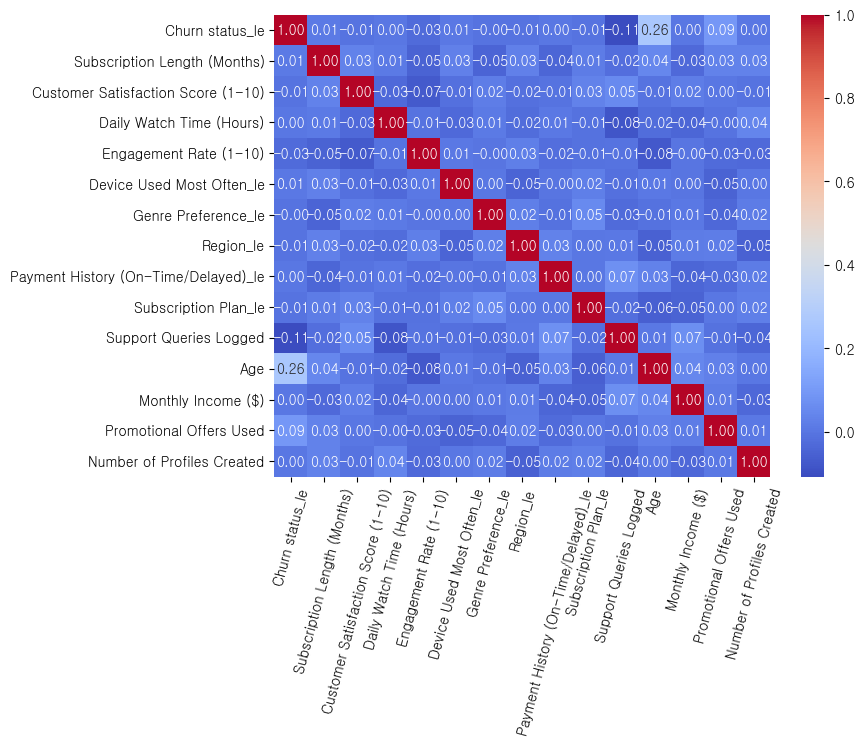

In [37]:
heat_map_columns = [
'Churn status_le',
'Subscription Length (Months)',
'Customer Satisfaction Score (1-10)',
'Daily Watch Time (Hours)',
'Engagement Rate (1-10)',
'Device Used Most Often_le',
'Genre Preference_le',
'Region_le',
'Payment History (On-Time/Delayed)_le',
'Subscription Plan_le',
'Support Queries Logged',
'Age',
'Monthly Income ($)',
'Promotional Offers Used',
'Number of Profiles Created'
]
# 상관계수 히트맵
heat_map_corr = df[heat_map_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(heat_map_corr, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("상관계수 히트맵 : 로그화된 리뷰 수 컬럼과 가격의 상관 관계 분석")
plt.xticks(rotation=75) 
plt.show()

### ### 이상치 탐색

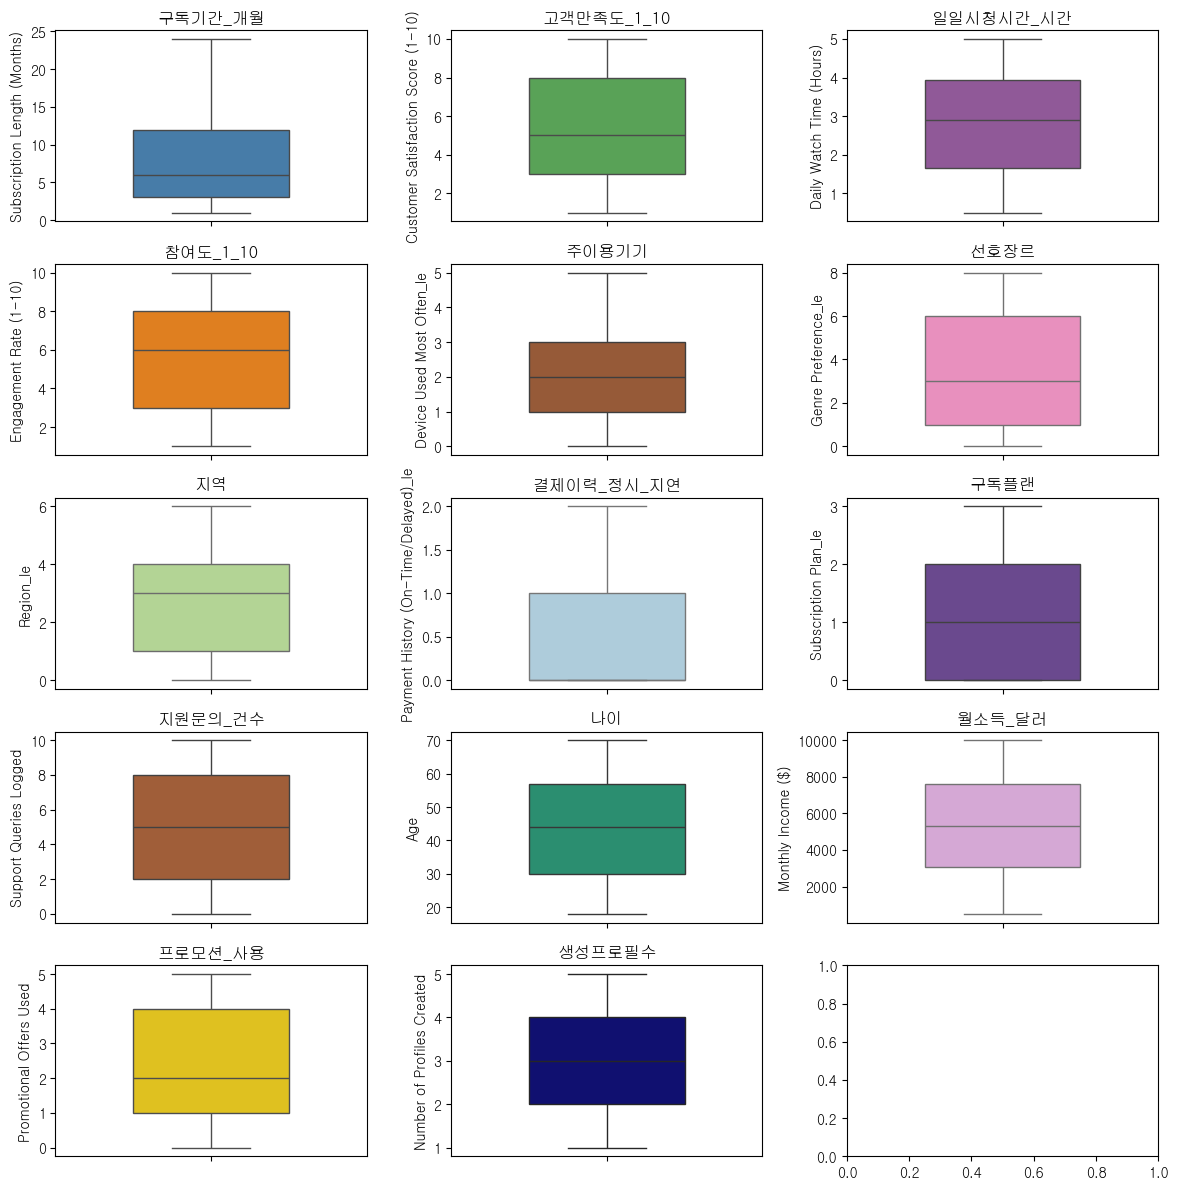

In [38]:

lst = [
    ('#377EB8', 'Subscription Length (Months)', 0, 0)
    ,('#4DAF4A', 'Customer Satisfaction Score (1-10)', 0, 1)
    ,('#984EA3', 'Daily Watch Time (Hours)', 0, 2)
    ,('#FF7F00', 'Engagement Rate (1-10)', 1, 0)
    ,('#A65628', 'Device Used Most Often_le', 1, 1)
    ,('#F781BF', 'Genre Preference_le', 1, 2)
    ,('#B2DF8A', 'Region_le', 2, 0)
    ,('#A6CEE3', 'Payment History (On-Time/Delayed)_le', 2, 1)
    ,('#6A3D9A', 'Subscription Plan_le', 2, 2)
    ,('#B15928', 'Support Queries Logged', 3, 0)
    ,('#1B9E77', 'Age', 3, 1)
    ,('#DDA0DD', 'Monthly Income ($)', 3, 2)
    ,('#FFD700', 'Promotional Offers Used', 4, 0)
    ,('#000080', 'Number of Profiles Created', 4, 1)
]


fig, axes = plt.subplots(5, 3, figsize=(12, 12))
# fig.suptitle('가격 분포 비교 (상위 % 제거)', fontsize=16, fontweight='bold')

for i, (color, col_name, row, col) in enumerate(lst):
    sns.boxplot(
        y=df[col_name],
        ax=axes[row, col],
        color=color,
        width=0.5,
        flierprops=dict(
            marker='o', markerfacecolor=color, markersize=5, 
                markeredgewidth=0.8, alpha=0.9
        )
    )
    axes[row, col].set_title(rename_map[col_name.replace('_le','')])


plt.tight_layout()
plt.show()

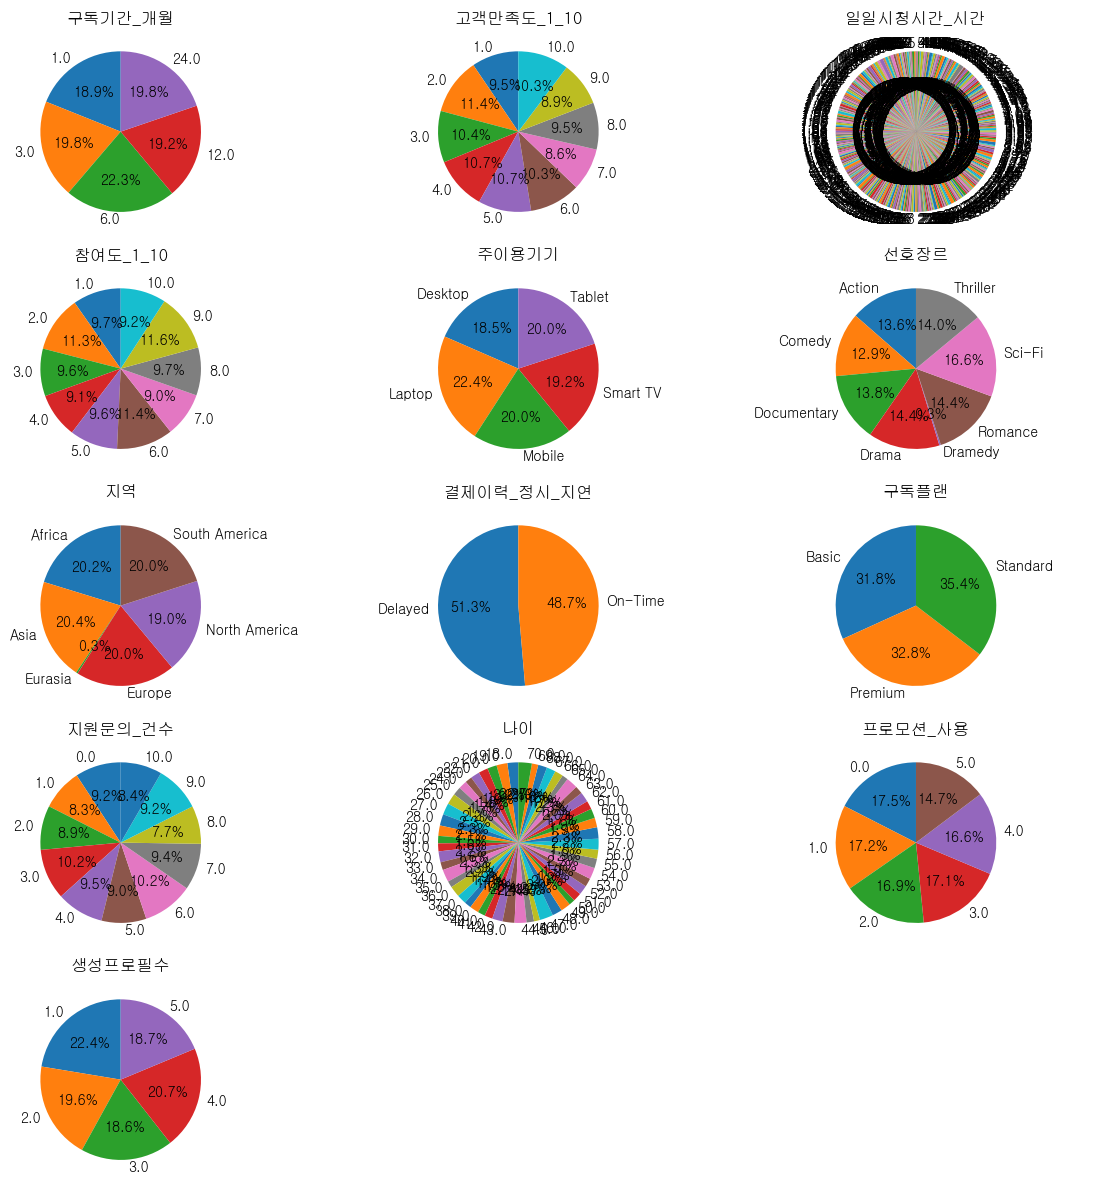

In [39]:
fig, axes = plt.subplots(5, 3, figsize=(12, 12))
# fig.suptitle('가격 분포 비교 (상위 % 제거)', fontsize=16, fontweight='bold')

lst = [
     ('Subscription Length (Months)', 0, 0)
    ,('Customer Satisfaction Score (1-10)', 0, 1)
    ,('Daily Watch Time (Hours)', 0, 2)
    ,('Engagement Rate (1-10)', 1, 0)
    ,('Device Used Most Often', 1, 1)
    ,('Genre Preference', 1, 2)
    ,('Region', 2, 0)
    ,('Payment History (On-Time/Delayed)', 2, 1)
    ,('Subscription Plan', 2, 2)
    ,('Support Queries Logged', 3, 0)
    ,('Age', 3, 1)
    # ,('Monthly Income ($)', 3, 2)
    ,('Promotional Offers Used', 3, 2)
    ,('Number of Profiles Created', 4, 0)
]

for i, (col_name, row, col) in enumerate(lst):
    
    # 결측치가 있는 컬럼은 dropna()로 제거
    ser = df[col_name].dropna().value_counts().sort_index()
    
    axes[row, col].pie(
            x=ser.values,
            labels=ser.index,
            autopct='%1.1f%%',
            startangle=90
        )
    # 데이터가 있는 경우만 pie 차트 생성
    # if len(ser) > 0:
        
    # else:
    #     # 데이터가 없는 경우 빈 차트
    #     axes[row, col].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[row, col].transAxes)
    
    axes[row, col].set_title(rename_map[col_name.replace('_le','')])

# 빈 subplot 제거 (14개 컬럼이므로 마지막 하나는 빈 공간)
axes[4, 1].axis('off')
axes[4, 2].axis('off')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.decomposition import PCA

df_pca_1 = df[['Subscription Length (Months)'
,'Customer Satisfaction Score (1-10)'
,'Daily Watch Time (Hours)'
,'Engagement Rate (1-10)'
,'Device Used Most Often_le'
,'Genre Preference_le'
,'Region_le'
,'Payment History (On-Time/Delayed)_le'
,'Subscription Plan_le'
,'Support Queries Logged'
,'Age'
,'Monthly Income ($)'
,'Promotional Offers Used'
,'Number of Profiles Created'
,'Churn status_le']]

for col_name in df_pca_1.columns:
    median_value = df_pca_1[col_name].median()
    df_pca_1[col_name].fillna(median_value, inplace=True)


x = df_pca_1.iloc[:,:-1]
y = df['Churn status_le']
pca = PCA(n_components=2) # 2차원으로 축소하겠다.

pca.fit(x)
# df_pca.info()
pca_result = pca.transform(x)


df_pca_2 = pd.DataFrame(pca_result, columns=['pca_col1','pca_col2'])
df_pca_2['target'] = df['Churn status_le']

# pca_result.shape


# displayPatterns(df_pca_2, 'target', True)

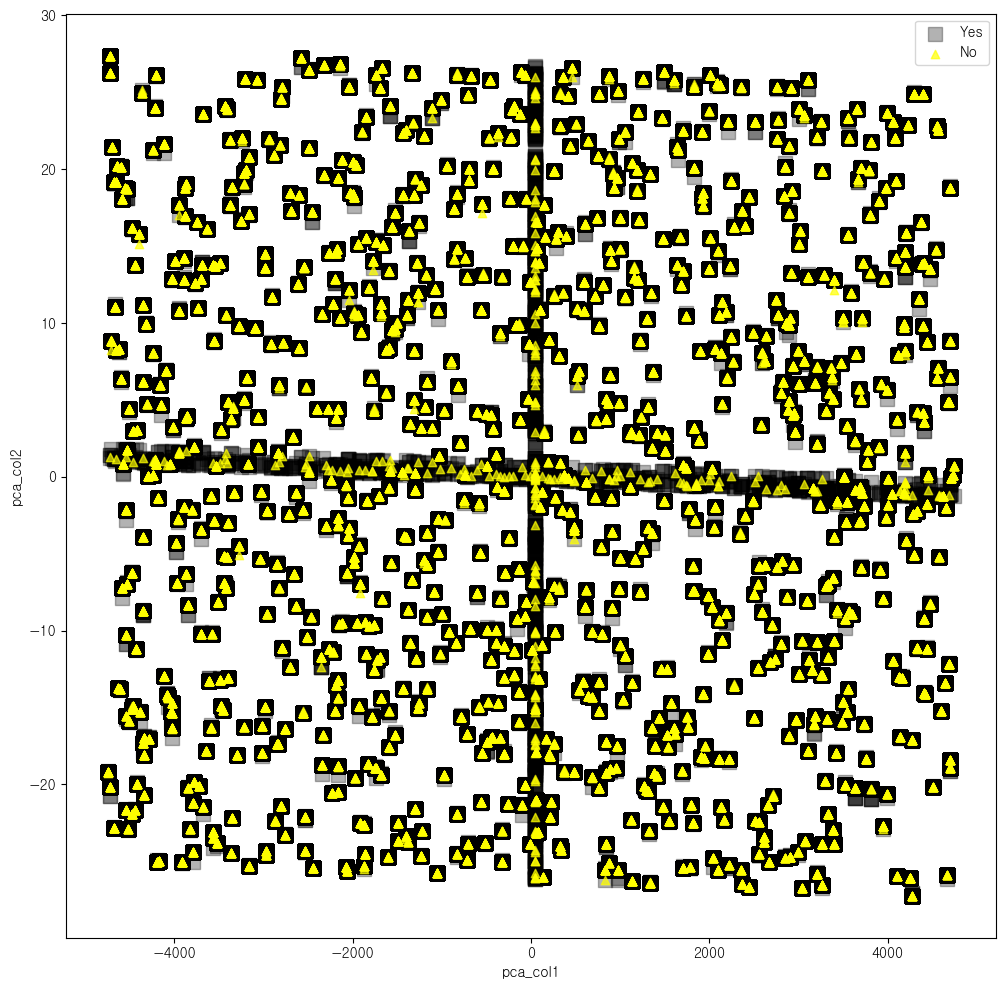

In [41]:
# 축소한 차원으로 시각화
markers = ['s', '^']

plt.figure(figsize=(12,12))

# sepal length (cm)	sepal width (cm)	
for i, marker in enumerate(markers):
    x = df_pca_2[df_pca_2['target'] == i]['pca_col1']
    y = df_pca_2[df_pca_2['target'] == i]['pca_col2']
    # print(len(df_pca_2[df_pca_2['target'] == i]['pca_col2']))
    if i == 0:
        plt.scatter(x,y, alpha=0.3, c='black', s=100, marker=marker, label=le_churn_status[i])
    else:
        plt.scatter(x,y, alpha=0.7, c='yellow', marker=marker, label=le_churn_status[i])
    # plt.scatter(x,y, marker=marker)


plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

## ## 6. 데이터 정제 및 전처리

1. 전체 중복 데이터 처리
2. Churn status (클래스 데이터 이므로 별도 처리)
   - 결측치 처리
   - 문자형 오류 데이터 치환 처리
   - 극 소수 데이터 처리
     - Maybe - 0.35%
3. Customer ID - 결측치 처리가 의미가 있는지 확인 필요
   - 결측치 401건 처리
4. 숫자형 컬럼 숫자 아닌 오류데이터 제거
   - Subscription Length (Months)
   - Customer Satisfaction Score (1-10)
   - Daily Watch Time (Hours)
   - Engagement Rate (1-10)
   - Support Queries Logged
   - Age
   - Monthly Income ($)
   - Promotional Offers Used
   - Number of Profiles Created
5. 범위가 정해진 숫자형 컬럼 데이터 정리 필요 1~10으로 한정
   - Engagement Rate (1-10)
   - Customer Satisfaction Score (1-10)
6. 범주화 필요
   - Daily Watch Time (Hours)
     - 시청시간 시간단위로 반올림
   - Age
     - 연령 10단위로 반올림
7. 문자형 오류 데이터 유사 문자 치환 처리
   - Device Used Most Often
     - 'Laptop', 'Mobile', 'Tablet', 'Smart TV', 'Desktop'
   - Genre Preference
     - 'Sci-Fi', 'Romance', 'Drama', 'Thriller', 'Documentary', 'Action', 'Comedy', 'Dramedy', 
   - Region
     - 'Asia', 'Africa', 'Europe', 'South America', 'North America', 'Eurasia', 
   - Payment History
     - 'Delayed', 'On-Time', 'Late', 
   - Subscription Plan
     - 'Standard', 'Premium', 'Basic',
8. 극 소수 데이터 처리
   - Device Used Most Often
     - Smart_Television - 0.32%
   - Genre Preference
     - Dramedy - 0.31%
   - Region
     - Eurasia - 0.32%
   - Payment History
     - Late - 0.32%

In [42]:
# 전체 중복 데이터 처리
# Customer ID - 결측치 401건 처리

## ## 7. 데이터 변환 및 피처 엔지니어링


## ## 8. 데이터 분할